# TF-IDF & Word2Vec Analysis

In [34]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
from gensim.models import Word2Vec
from wordcloud import WordCloud
import pickle

# Full Corpus

## TF-IDF Analysis

In [35]:
#load data set
df = pd.read_csv('../results/tfidf_enriched.csv').drop('Unnamed: 0', axis=1)
df.head(5)

,Filename,Top 10 TF-IDF Words,Year,Region
0,fran_q1_2011.txt,"[('border', 0.34642789292616993), ('detection'...",2011,Global
1,afic_2017.txt,"[('afic', 0.49029092129688284), ('niger', 0.25...",2017,Africa
2,2023.11.16_frontex-general-industry-days-innov...,"[('industry', 0.3508179021509025), ('innovatio...",2023,Other
3,ara-2022-public-web.txt,"[('border', 0.34045937196548115), ('eu', 0.267...",2022,Other
4,afic_2016.txt,"[('afic', 0.5395538529664771), ('niger', 0.193...",2016,Africa


### TF-IDF Scores per Region

In [36]:
# Display settings for bar plots
sns.set(rc={'figure.figsize': (20, 10)})
#color palette
sns.color_palette('magma', as_cmap=True)

#other
sns.set_context('paper')
sns.set_style('ticks') 
sns.axes_style('ticks')
plt.rcParams.update({'axes.labelsize': 20, 'axes.titlesize': 25,'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16})

#### One Barplot per Region

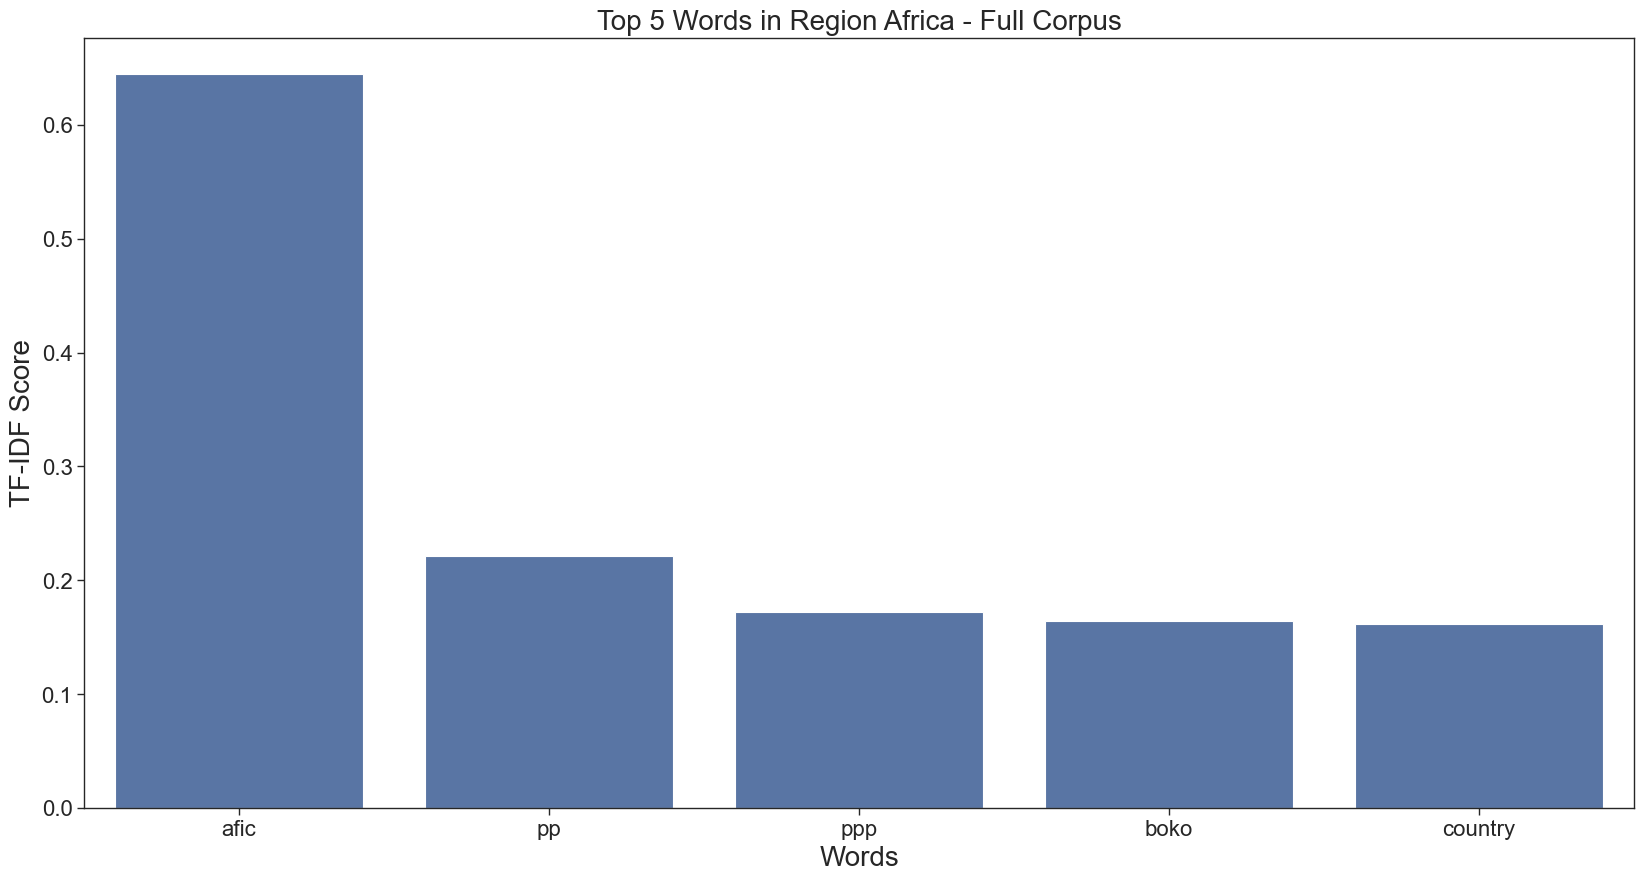

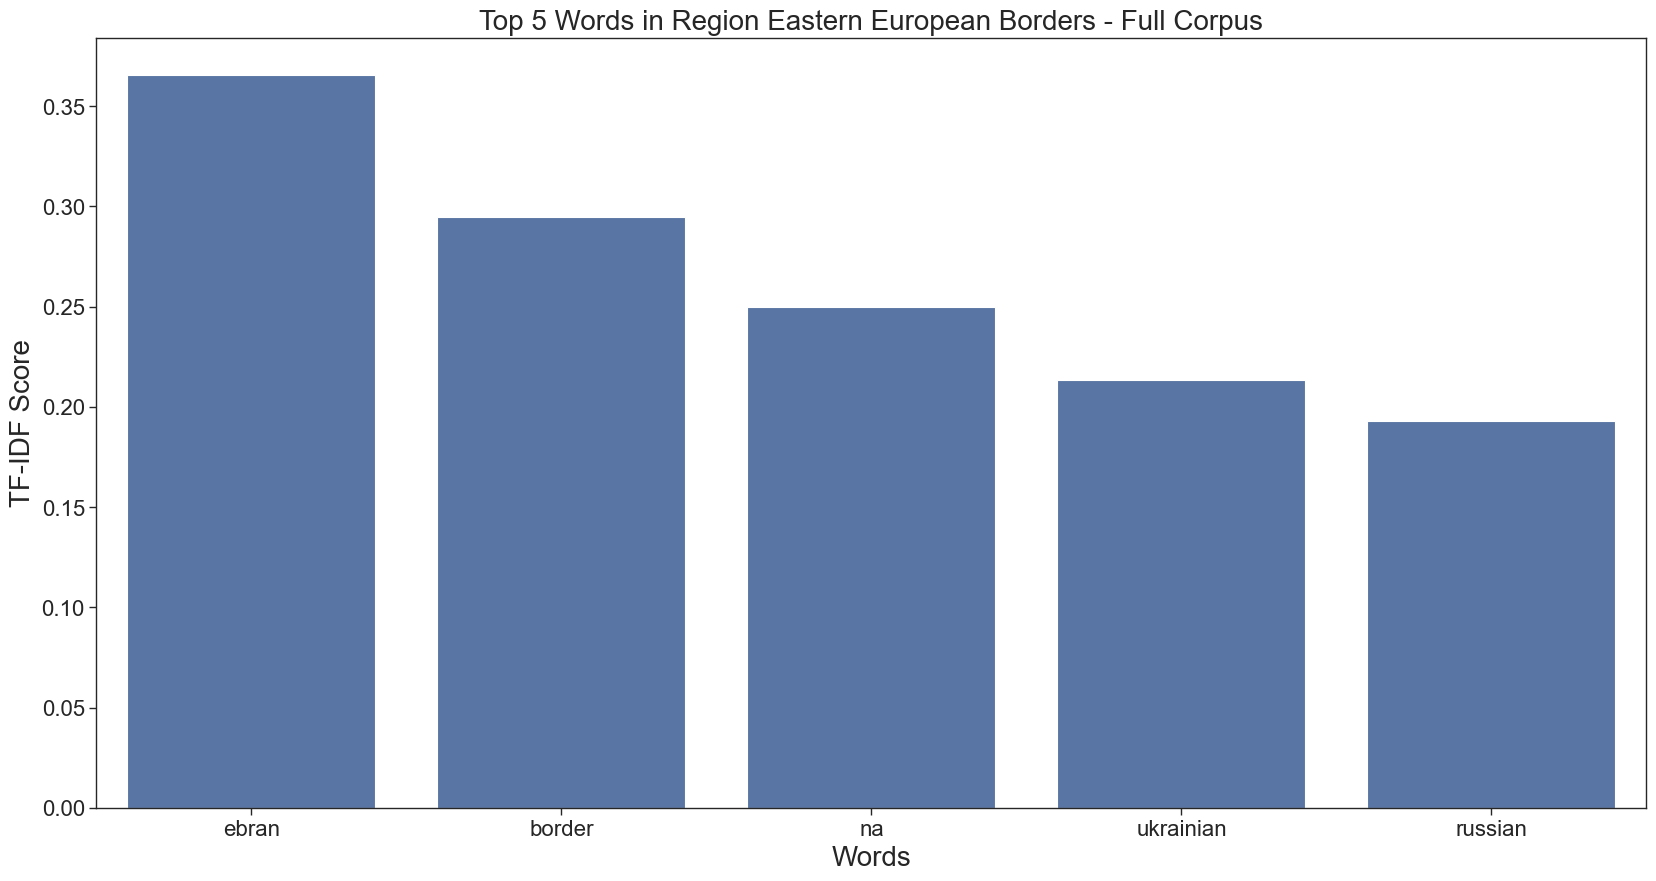

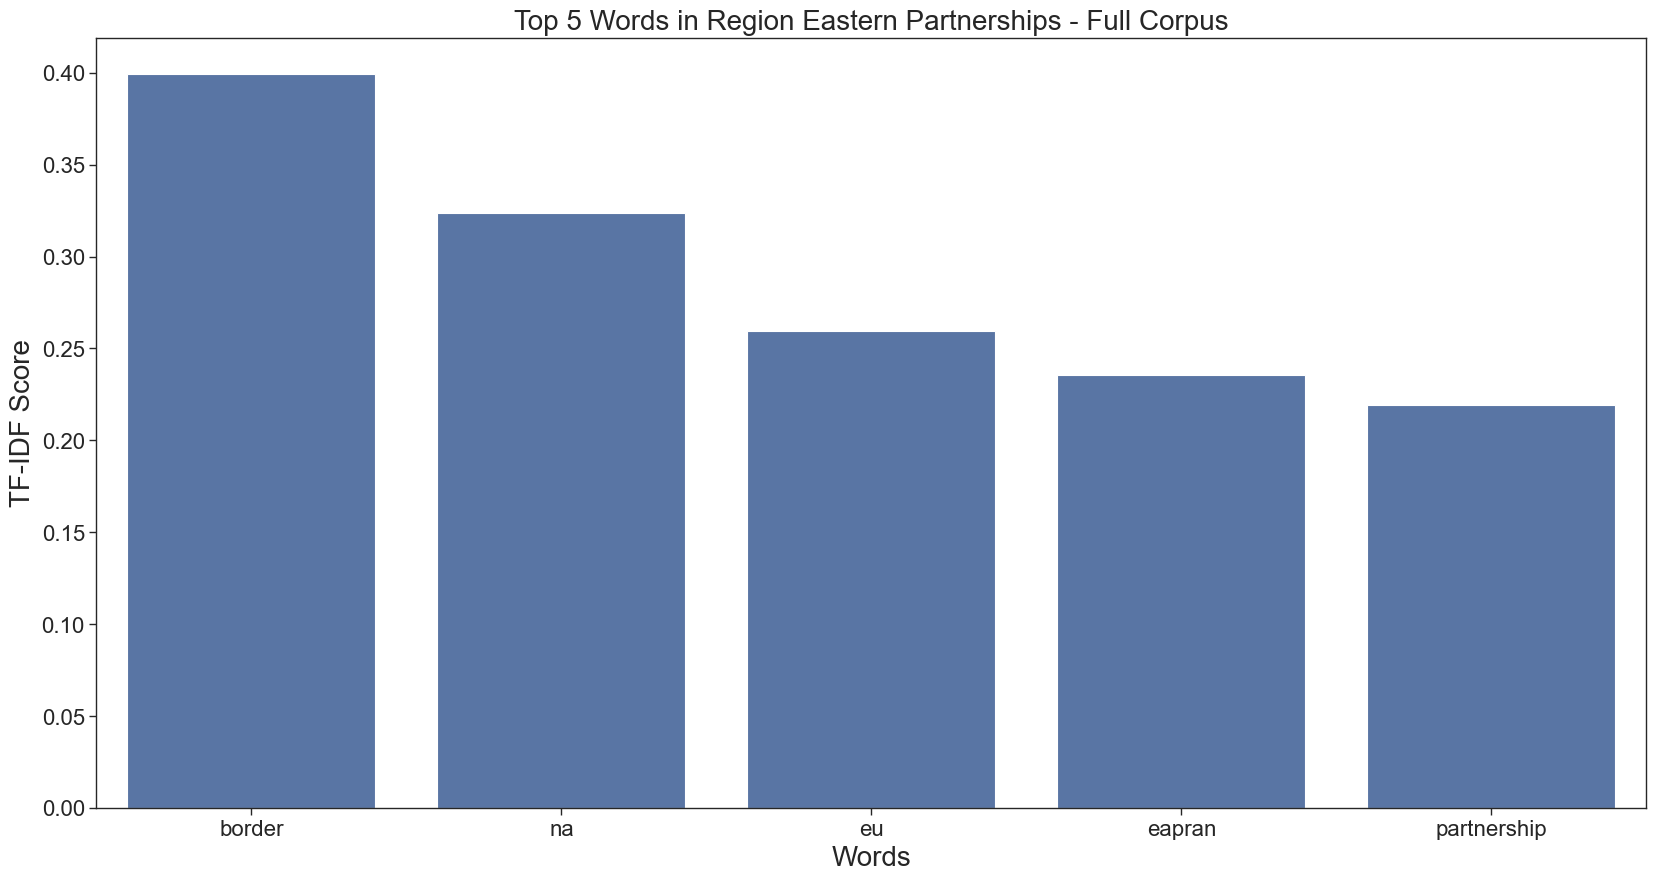

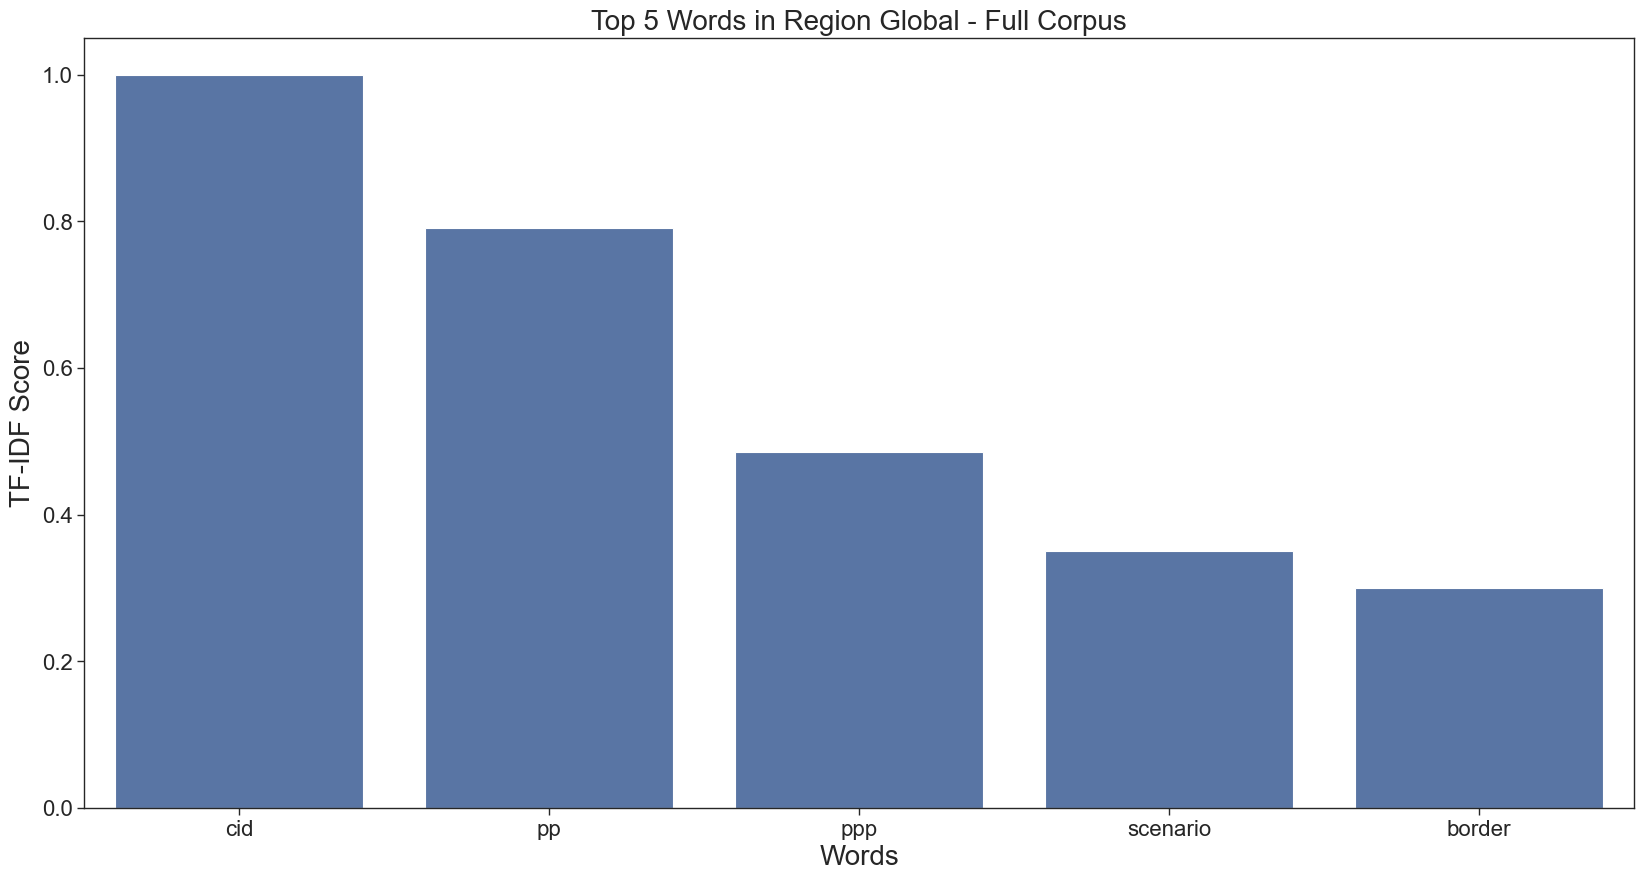

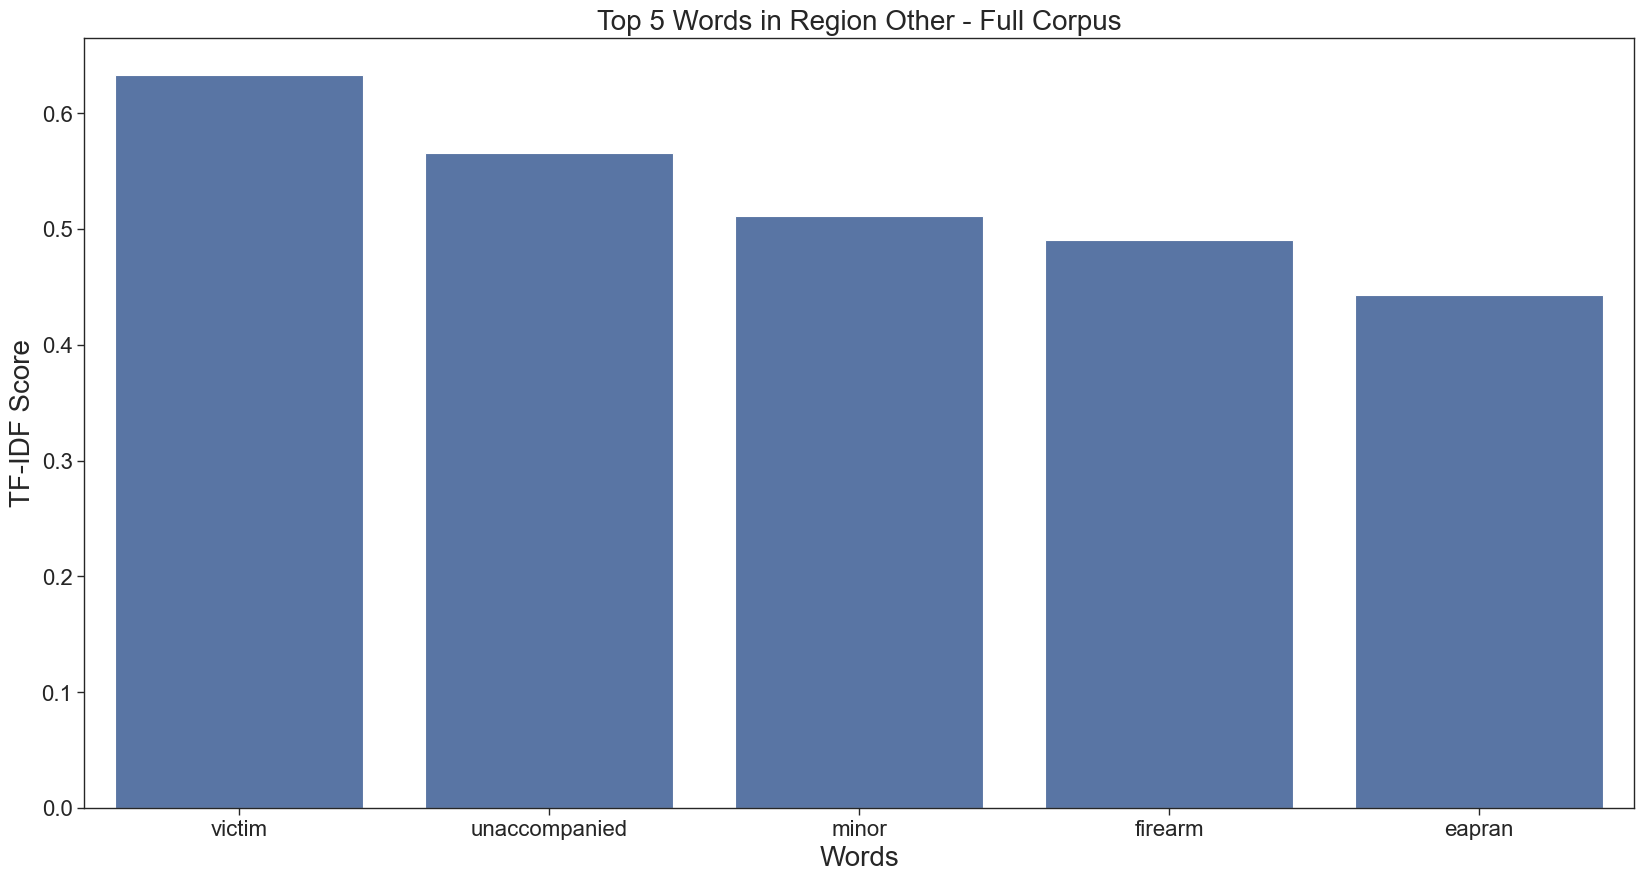

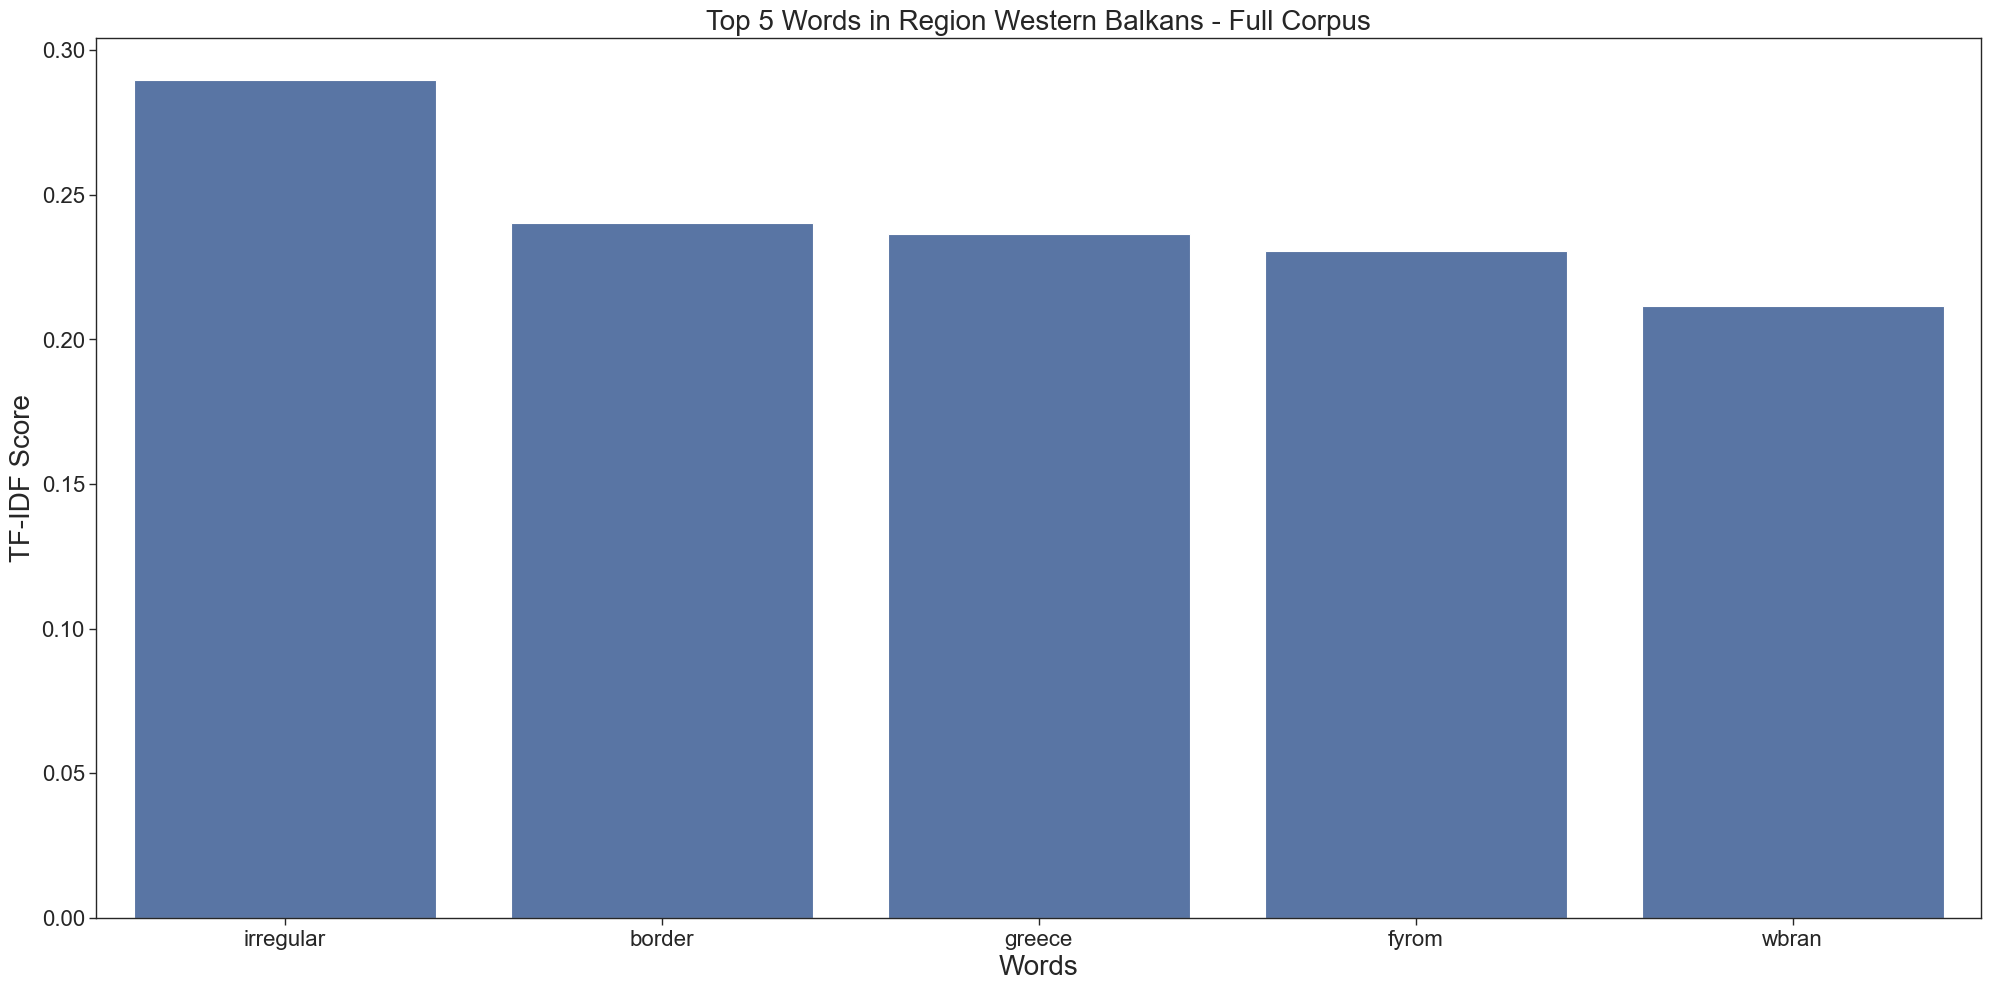

In [37]:
# Group by 'Region' and concatenate all TF-IDF tuples
grouped_region = df.groupby('Region')['Top 10 TF-IDF Words'].sum()

# Convert grouped_region.items() to a list of tuples
grouped_region_items = list(grouped_region.items())

for i, (region, tfidf_tuples_str) in enumerate(grouped_region_items):
    # Use regular expressions to extract tuples from string
    tfidf_tuples_str_list = re.findall(r"\('(.*?)', (.*?)\)", tfidf_tuples_str)
    
    # Convert string representation of score to float
    tfidf_tuples = [(word, float(score)) for word, score in tfidf_tuples_str_list]
    
    # Filter out tuples that do not have 2 elements
    filtered_tuples = [t for t in tfidf_tuples if len(t) == 2]
    
    # Sort by TF-IDF score and get top 5
    top_5 = Counter(dict(filtered_tuples)).most_common(5)
    # Check if top_5 is not empty
    if top_5:
        # Prepare data for seaborn
        words, scores = zip(*top_5)
        data = pd.DataFrame({'Words': words, 'TF-IDF Score': scores})
        
        # Create a new figure for each region
        plt.figure(i)
        
        # Plot using seaborn
        sns.barplot(x='Words', y='TF-IDF Score', data=data)
        plt.title(f'Top 5 Words in Region {region} - Full Corpus')
        plt.xlabel('Words')
        plt.ylabel('TF-IDF Score')

plt.tight_layout()
plt.show()

#### One Combined Barplot with Region as Legend

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_21089/1268093997.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data = pd.concat([all_data, data], ignore_index=True)


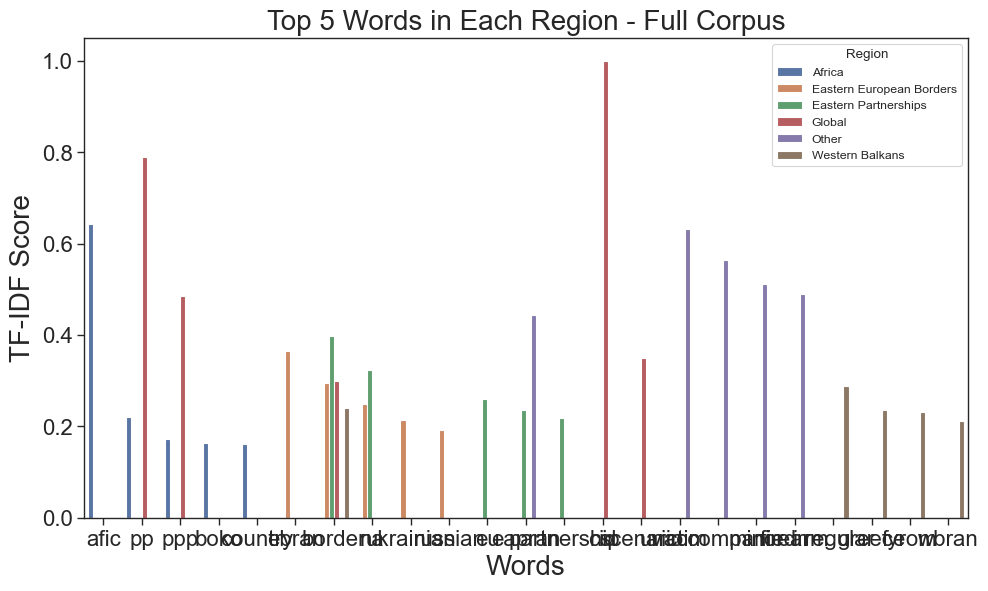

In [38]:
# Prepare an empty DataFrame for all data
all_data = pd.DataFrame(columns=['Region', 'Words', 'TF-IDF Score'])

for region, tfidf_tuples_str in grouped_region_items:
    # Use regular expressions to extract tuples from string
    tfidf_tuples_str_list = re.findall(r"\('(.*?)', (.*?)\)", tfidf_tuples_str)
    
    # Convert string representation of score to float
    tfidf_tuples = [(word, float(score)) for word, score in tfidf_tuples_str_list]
    
    # Filter out tuples that do not have 2 elements
    filtered_tuples = [t for t in tfidf_tuples if len(t) == 2]
    
    # Sort by TF-IDF score and get top 5
    top_5 = Counter(dict(filtered_tuples)).most_common(5)
    
    # Check if top_5 is not empty
    if top_5:
        # Prepare data for seaborn
        words, scores = zip(*top_5)
        data = pd.DataFrame({'Region': [region]*len(words), 'Words': words, 'TF-IDF Score': scores})
        
        # Append data to all_data
        all_data = pd.concat([all_data, data], ignore_index=True)

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Words', y='TF-IDF Score', hue='Region', data=all_data)
plt.title('Top 5 Words in Each Region - Full Corpus')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.tight_layout()
plt.show()

#### Heatmap - Regions

In [39]:
# Display settings for heatmap
plt.rcParams.update({'axes.labelsize': 10, 'axes.titlesize': 15,'axes.titlesize': 10, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

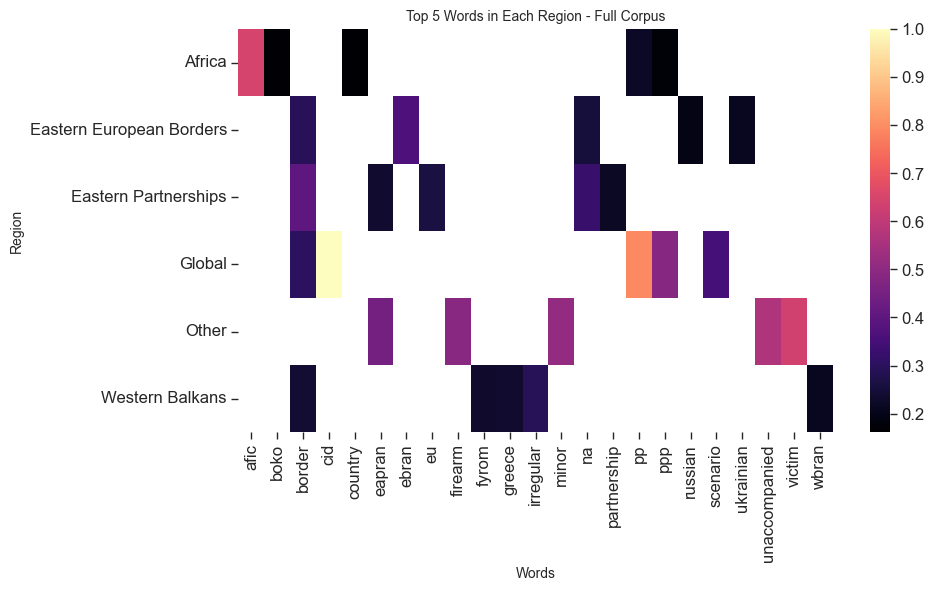

In [40]:
# Pivot the data for the heatmap
heatmap_data = all_data.pivot(index='Region', columns='Words', values='TF-IDF Score')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='magma')
plt.title('Top 5 Words in Each Region - Full Corpus')
plt.xlabel('Words')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

    Out of all three visualization methods, heatmap is the best (visually), but results are not very insightful.

### TF-IDF Scores per Year

#### One Barplot per Year

In [41]:
# Display settings for bar plots
sns.set(rc={'figure.figsize': (20, 10)})
#color palette
sns.color_palette('magma', as_cmap=True)

#other
sns.set_context('paper')
sns.set_style('ticks') 
sns.axes_style('ticks')
plt.rcParams.update({'axes.labelsize': 20, 'axes.titlesize': 25,'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16})

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_21089/4159183781.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data_year = pd.concat([all_data_year, data], ignore_index=True)


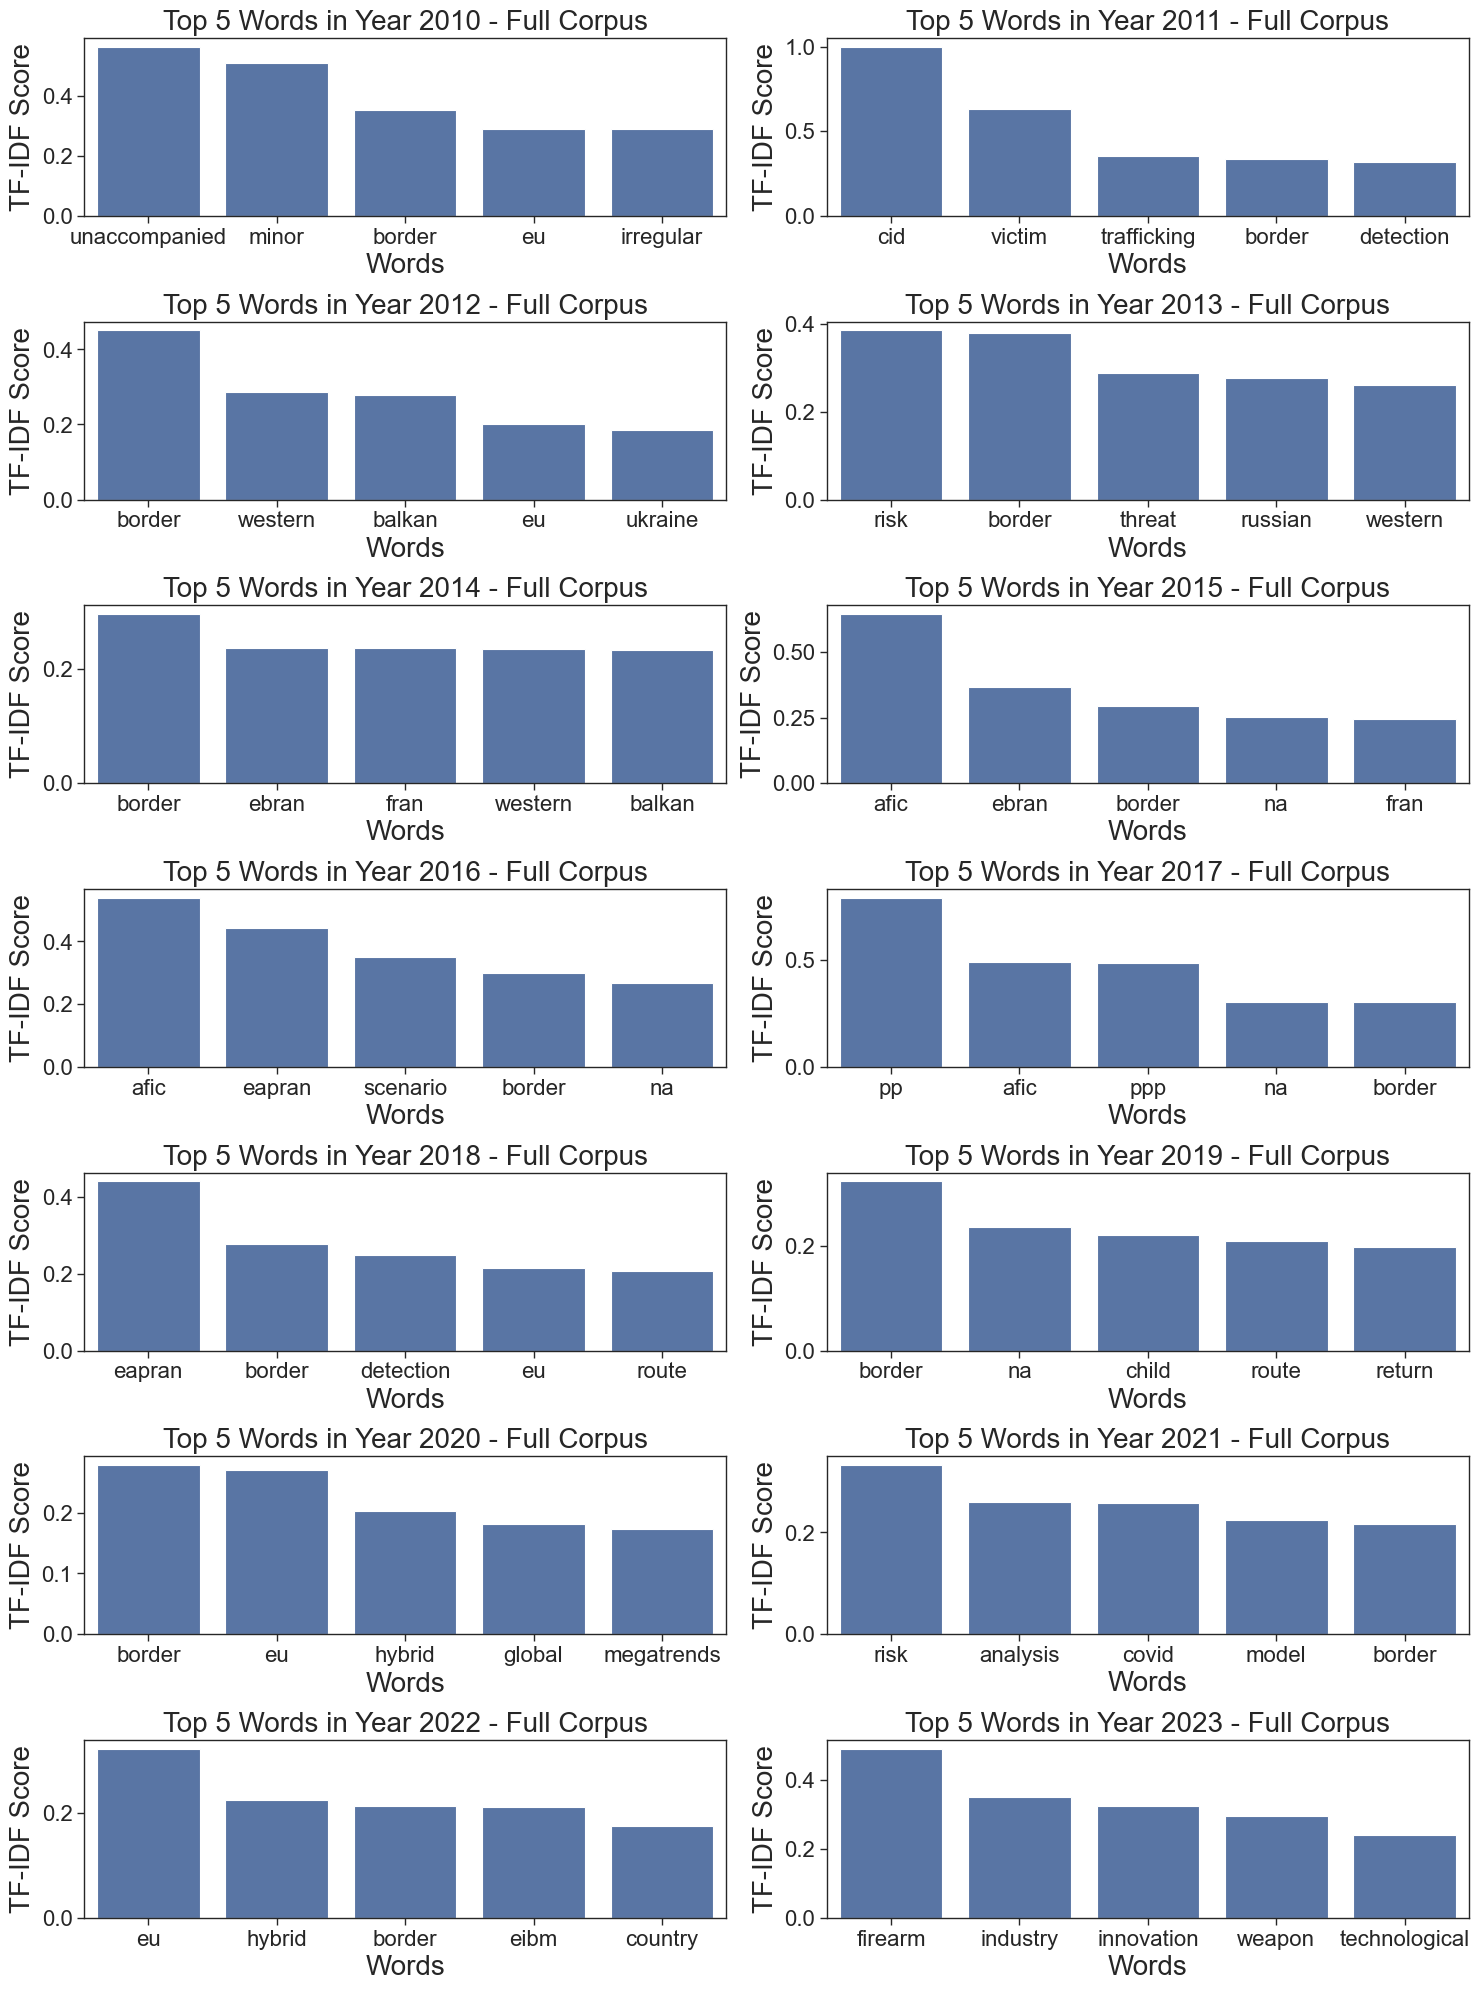

In [42]:
# Prepare an empty DataFrame for all data
all_data_year = pd.DataFrame(columns=['Year', 'Words', 'TF-IDF Score'])
# Group by 'year' and concatenate all TF-IDF tuples
grouped_year = df.groupby('Year')['Top 10 TF-IDF Words'].sum()

# Convert grouped_year.items() to a list of tuples
grouped_year_items = list(grouped_year.items())

# Create a figure to hold the subplots
fig = plt.figure(figsize=(15, 20))

for i, (year, tfidf_tuples_str) in enumerate(grouped_year_items):
    # Use regular expressions to extract tuples from string
    tfidf_tuples_str_list = re.findall(r"\('(.*?)', (.*?)\)", tfidf_tuples_str)
    
    # Convert string representation of score to float
    tfidf_tuples = [(word, float(score)) for word, score in tfidf_tuples_str_list]
    
    # Filter out tuples that do not have 2 elements
    filtered_tuples = [t for t in tfidf_tuples if len(t) == 2]
    
    # Sort by TF-IDF score and get top 5
    top_5 = Counter(dict(filtered_tuples)).most_common(5)
    # Check if top_5 is not empty
    if top_5:
        # Prepare data for seaborn
        words, scores = zip(*top_5)
        data = pd.DataFrame({'Year': [year]*len(words), 'Words': words, 'TF-IDF Score': scores})
        # Append data to all_data
        all_data_year = pd.concat([all_data_year, data], ignore_index=True)
        
        # Create a new subplot in the grid
        ax = fig.add_subplot(7, 2, i+1)
        
        # Plot using seaborn
        sns.barplot(x='Words', y='TF-IDF Score', data=data, ax=ax)
        ax.set_title(f'Top 5 Words in Year {year} - Full Corpus')
        ax.set_xlabel('Words')
        ax.set_ylabel('TF-IDF Score')

plt.tight_layout()
plt.show()

#### Heatmap - Years

In [43]:
all_data_year = all_data_year[all_data_year['TF-IDF Score'] >= 0.3]

In [44]:
#Display settings for heatmap
sns.set(rc={'figure.figsize': (100, 50)})
plt.rcParams.update({'axes.labelsize': 10, 'axes.titlesize': 15,'axes.titlesize': 10, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

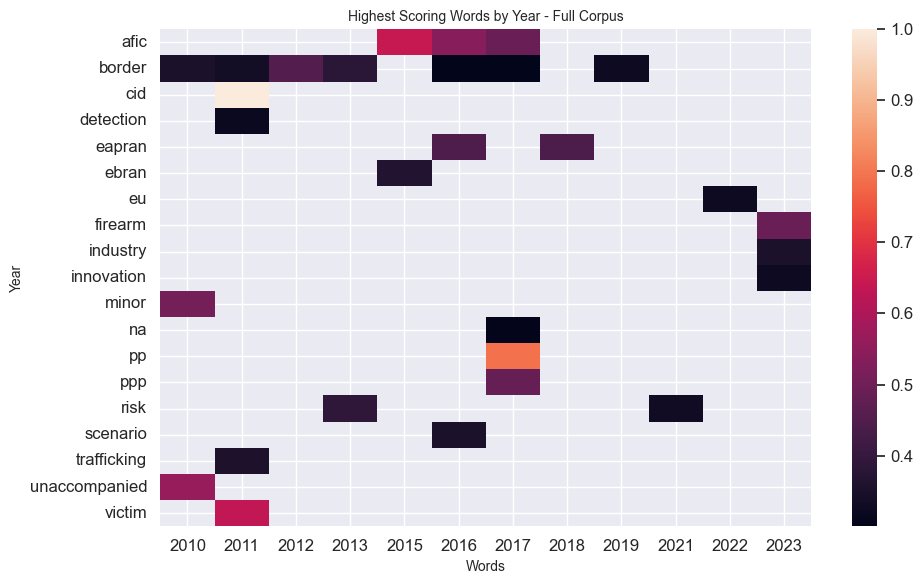

In [45]:
# Pivot the data for the heatmap
heatmap_data = all_data_year.pivot(index='Words', columns='Year', values='TF-IDF Score')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data)
plt.title('Highest Scoring Words by Year - Full Corpus')
plt.xlabel('Words')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

## Word2Vec Analysis

In [46]:
#load word2vec model from models folder
model = Word2Vec.load('../model/word2vec_model.model')

### Most Similar Words

In [47]:
#find most similar words to specific keywords
similar_migrant = model.wv.most_similar('migrant', topn=5)
similar_refugee = model.wv.most_similar('refugee', topn=5)
similar_migration =  model.wv.most_similar('migration', topn=5)
similar_asylum = model.wv.most_similar('asylum', topn=5)
similar_border = model.wv.most_similar('border', topn=5)
similar_eu = model.wv.most_similar('eu', topn=5)

In [48]:
# print each keyword and most similar words
print('Most similar words to migrant:', similar_migrant)
print('Most similar words to refugee:', similar_refugee)
print('Most similar words to migration:', similar_migration)
print('Most similar words to asylum:', similar_asylum)
print('Most similar words to border:', similar_border)
print('Most similar words to eu:', similar_eu)

Most similar words to migrant: [('itator', 0.6682648062705994), ('flowpressure', 0.6629104018211365), ('subsaha', 0.6622160077095032), ('grant', 0.6528064012527466), ('nor', 0.6519133448600769)]
Most similar words to refugee: [('unhcr', 0.6417786478996277), ('fami', 0.5962821841239929), ('commissioner', 0.5890510082244873), ('refuge', 0.5874515175819397), ('stitution', 0.5837869644165039)]
Most similar words to migration: [('migra', 0.6201515793800354), ('irregular', 0.6019916534423828), ('irregu', 0.5884608030319214), ('gration', 0.5833595395088196), ('migratory', 0.5741254091262817)]
Most similar words to asylum: [('asy', 0.7256491780281067), ('lum', 0.6802784204483032), ('plication', 0.6761475205421448), ('abscond', 0.6722460389137268), ('implicitly', 0.6626911163330078)]
Most similar words to border: [('finnishrussian', 0.6752310991287231), ('continu', 0.6708342432975769), ('romanianmoldovan', 0.6662383675575256), ('slovakianukrainian', 0.6643111705780029), ('funded', 0.66276049613

## WordCloud

In [49]:
#load corpus file from corpus folder with pickle
with open('../data/corpus/corpus.pkl', 'rb') as f:
    corpus = pickle.load(f)

# Convert list of lists into a single list
corpus_flat = [word for sublist in corpus for word in sublist]

#create a wordcloud of all images in the corpus
wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(corpus_flat))

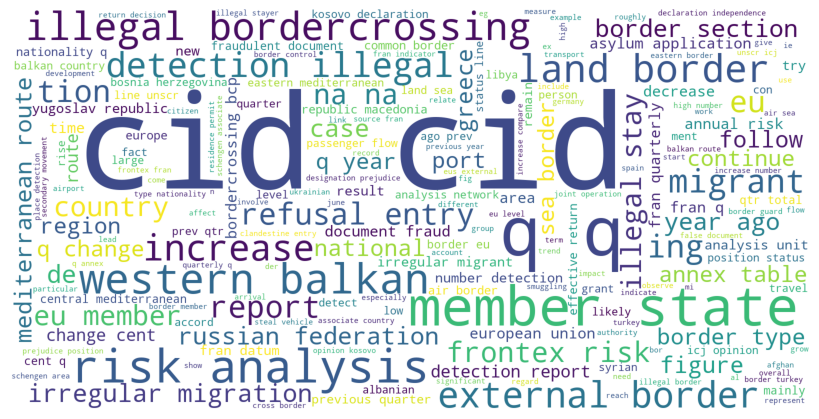

In [50]:
#plot wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Annual Risk Analysis Reports Only

## TF-IDF Analysis

### Bar Plots per Year

In [57]:
#load data set
df = pd.read_csv('../results/tfidf_enriched_annual.csv').drop('Unnamed: 0', axis=1)
df.head(5)

,Filename,Top 10 TF-IDF Words,Year
0,risk_analysis_for_2019ws.txt,"[('border', 0.3653070781879702), ('na', 0.2459...",2019
1,annual_risk_analysis_2017ws.txt,"[('border', 0.36093753795957656), ('eu', 0.249...",2017
2,risk_analysis_for_2018ws.txt,"[('border', 0.3940470298850306), ('number', 0....",2018
3,risk_analysis_2021-2.txt,"[('border', 0.4378720407730829), ('eu', 0.2090...",2021
4,strategic-risk-analysis-2020.txt,"[('border', 0.38609257133408537), ('eu', 0.311...",2020


In [58]:
# Display settings for bar plots
sns.set(rc={'figure.figsize': (20, 10)})
#color palette
sns.color_palette('magma', as_cmap=True)

#other
sns.set_context('paper')
sns.set_style('ticks') 
sns.axes_style('ticks')
plt.rcParams.update({'axes.labelsize': 20, 'axes.titlesize': 25,'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16})

/var/folders/fd/qf26p3js3x32_9_qwsb841y80000gn/T/ipykernel_21089/417171393.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_data_year_annual = pd.concat([all_data_year_annual, data], ignore_index=True)


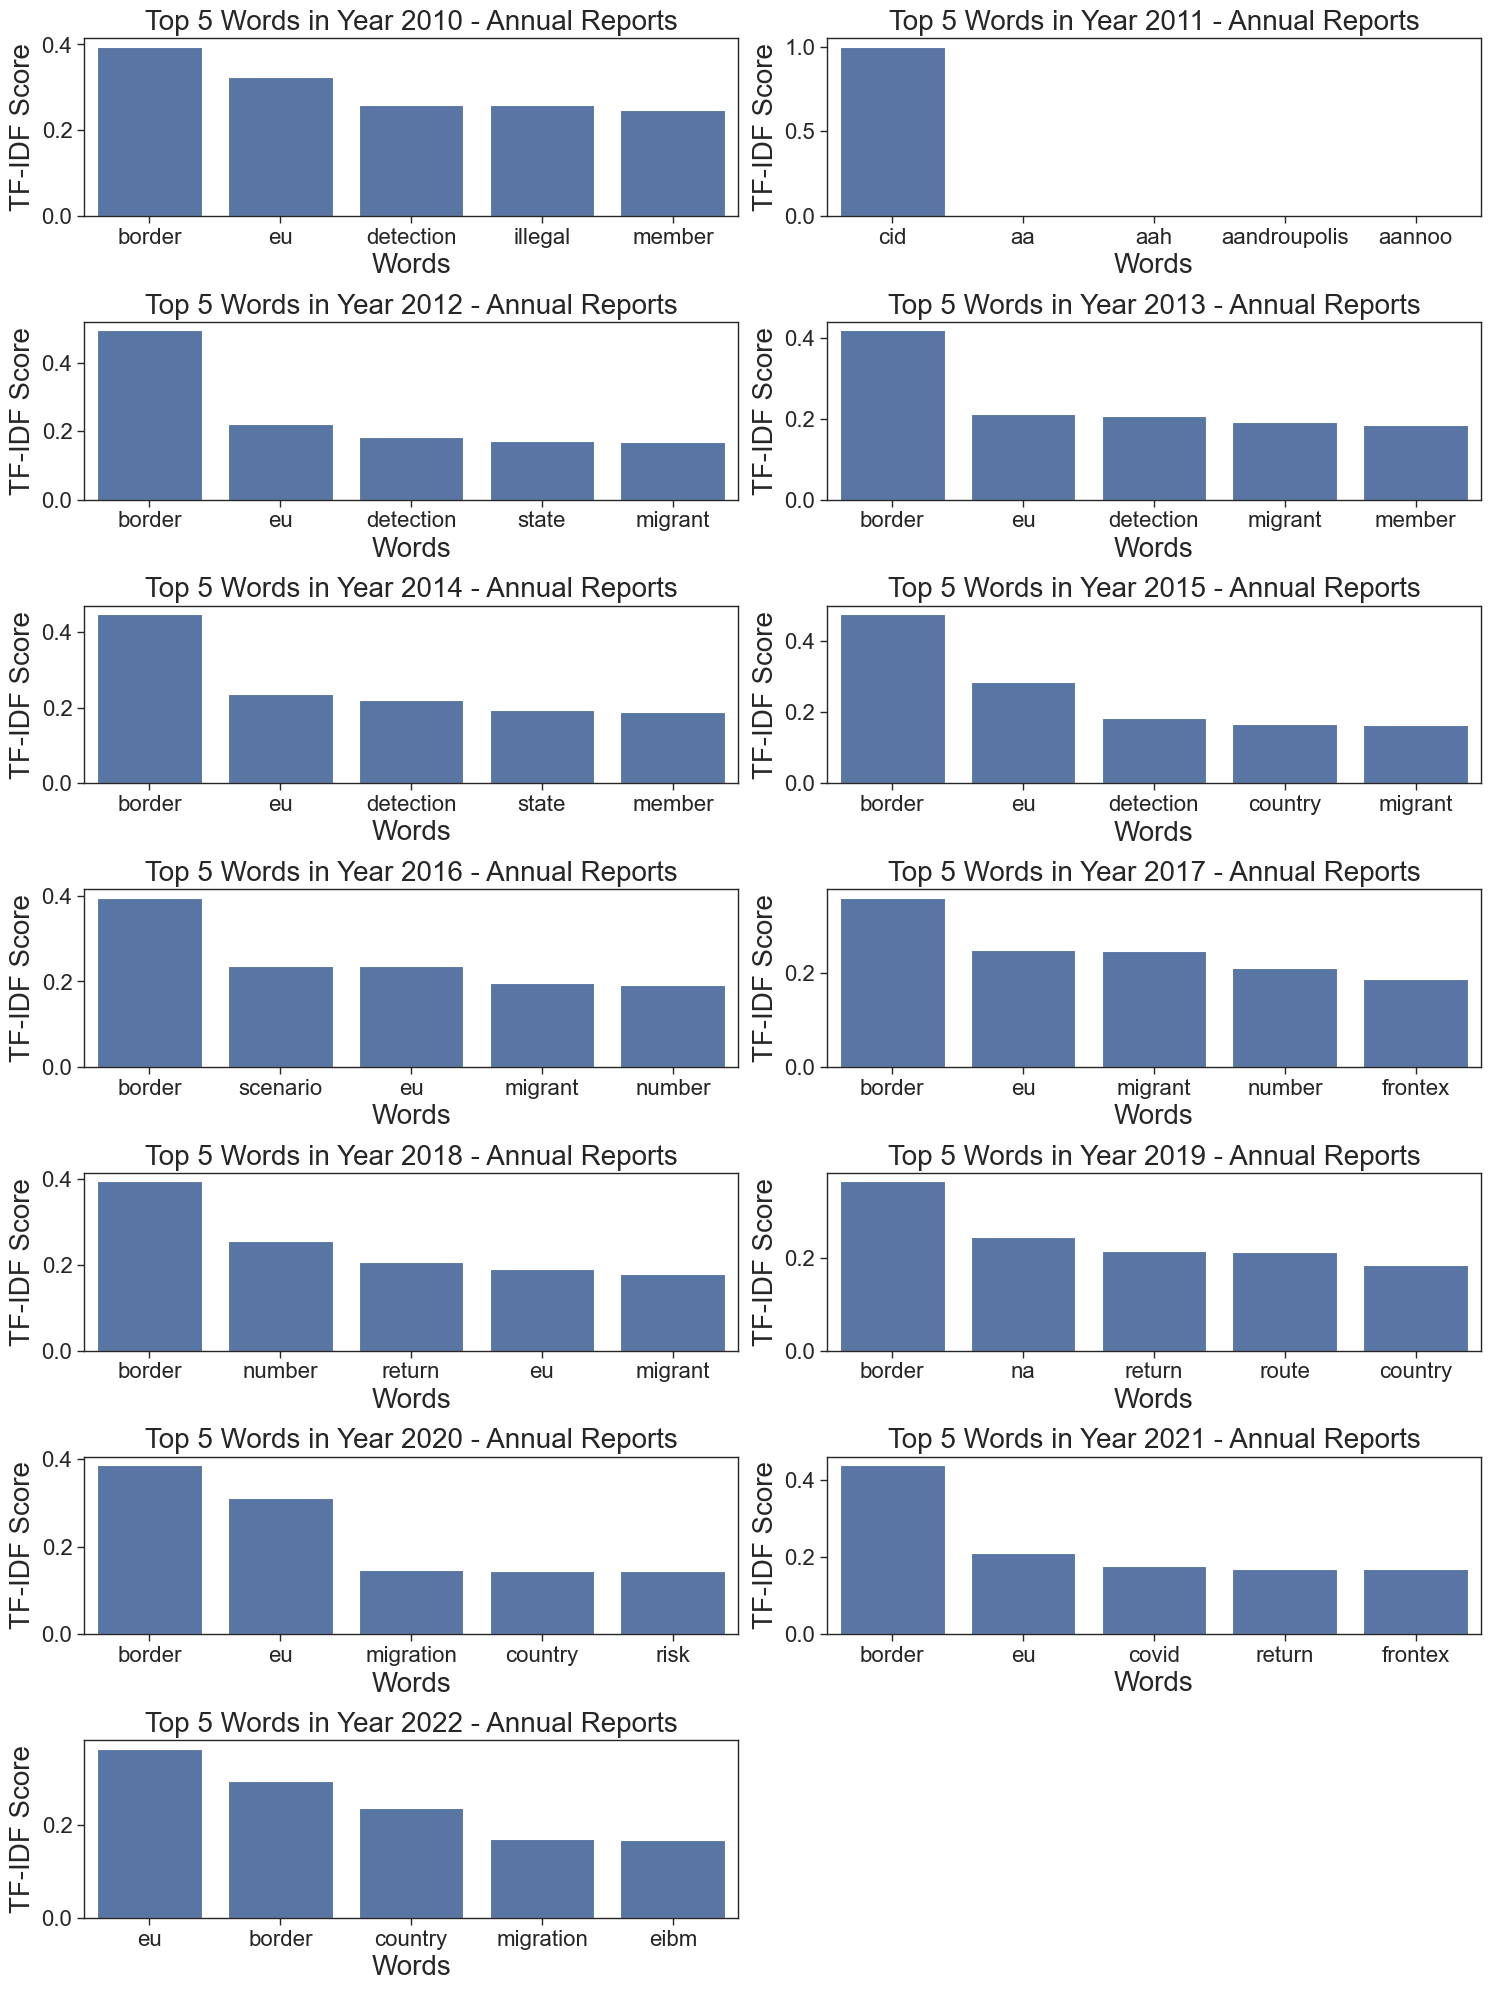

In [59]:
# Prepare an empty DataFrame for all data
all_data_year_annual = pd.DataFrame(columns=['Year', 'Words', 'TF-IDF Score'])
# Group by 'year' and concatenate all TF-IDF tuples
grouped_year_annual = df.groupby('Year')['Top 10 TF-IDF Words'].sum()

# Convert grouped_year.items() to a list of tuples
grouped_year_items_annual = list(grouped_year_annual.items())

# Create a figure to hold the subplots
fig = plt.figure(figsize=(15, 20))

for i, (year, tfidf_tuples_str) in enumerate(grouped_year_items_annual):
    # Use regular expressions to extract tuples from string
    tfidf_tuples_str_list = re.findall(r"\('(.*?)', (.*?)\)", tfidf_tuples_str)
    
    # Convert string representation of score to float
    tfidf_tuples = [(word, float(score)) for word, score in tfidf_tuples_str_list]
    
    # Filter out tuples that do not have 2 elements
    filtered_tuples = [t for t in tfidf_tuples if len(t) == 2]
    
    # Sort by TF-IDF score and get top 5
    top_5 = Counter(dict(filtered_tuples)).most_common(5)
    # Check if top_5 is not empty
    if top_5:
        # Prepare data for seaborn
        words, scores = zip(*top_5)
        data = pd.DataFrame({'Year': [year]*len(words), 'Words': words, 'TF-IDF Score': scores})
        # Append data to all_data
        all_data_year_annual = pd.concat([all_data_year_annual, data], ignore_index=True)
        
        # Create a new subplot in the grid
        ax = fig.add_subplot(7, 2, i+1)
        
        # Plot using seaborn
        sns.barplot(x='Words', y='TF-IDF Score', data=data, ax=ax)
        ax.set_title(f'Top 5 Words in Year {year} - Annual Reports')
        ax.set_xlabel('Words')
        ax.set_ylabel('TF-IDF Score')

plt.tight_layout()
plt.show()

### Heatmap

In [60]:
#Display settings for heatmap
sns.set(rc={'figure.figsize': (100, 50)})
plt.rcParams.update({'axes.labelsize': 10, 'axes.titlesize': 15,'axes.titlesize': 10, 'xtick.labelsize': 12, 'ytick.labelsize': 12})

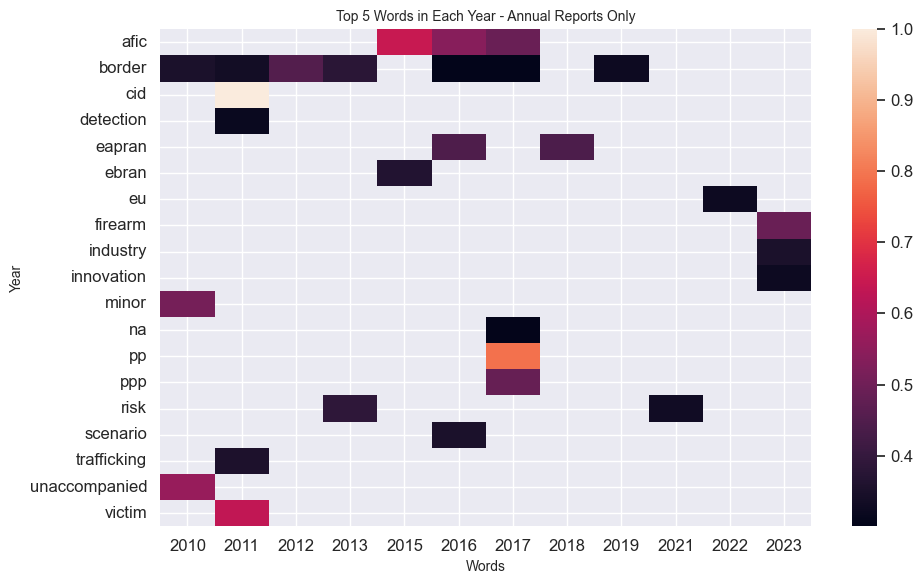

In [61]:
#filter out low-scorig words
all_data_year_annual = all_data_year_annual[all_data_year_annual['TF-IDF Score'] >= 0.3]

# Pivot the data for the heatmap
heatmap_data_annual = all_data_year_annual.pivot(index='Words', columns='Year', values='TF-IDF Score')

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data)
plt.title('Top 5 Words in Each Year - Annual Reports Only')
plt.xlabel('Words')
plt.ylabel('Year')
plt.tight_layout()
plt.show()

## Word Cloud

In [64]:
#load corpus file from corpus folder with pickle
with open('../data/corpus/corpus_annual.pkl', 'rb') as f:
    corpus_annual = pickle.load(f)

# Convert list of lists into a single list
corpus_annual_flat = [word for sublist in corpus_annual for word in sublist]

#create a wordcloud of all images in the corpus
wordcloud_annual = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(' '.join(corpus_annual_flat))

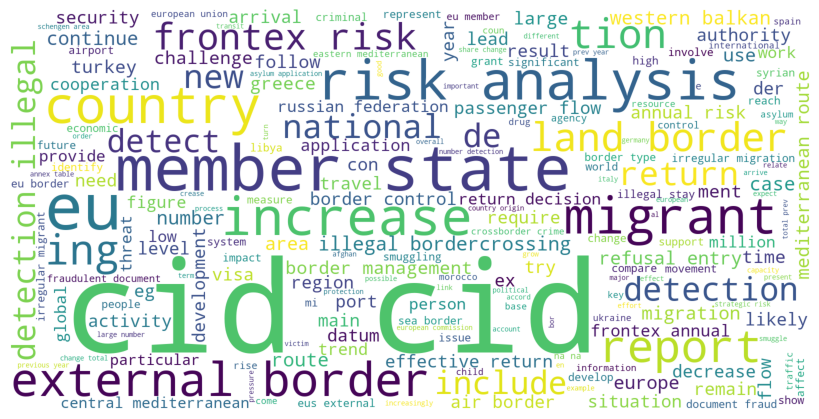

In [65]:
#plot wordcloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_annual)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()